In [1]:
with open('./neko.txt', mode='r', encoding='utf-8') as f:
    wagahai = f.read()

wagahai_list = wagahai.split('\n')


# 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
from janome.tokenizer import Tokenizer
t = Tokenizer()

def add_token_to_dict(v, obj, token):
    if v in obj:
        obj[v] += [token]
    else:
        obj[v] = [token]

surface_dict = {}
surface_sentence_dict = {}
# base_dict = {}
# pos_dict = {}
# pos1_dict = {}
all_word_list = []
for sentence in wagahai_list:
    sentence = sentence.strip()
    for token in t.tokenize(sentence.strip()):
        pos = token.part_of_speech.split(',')
        # if pos[0] not in ['動詞', '名詞', '形容詞', '副詞']:
        if pos[0] not in ['名詞']:
            continue

        add_token_to_dict(token.surface, surface_dict, token)
        # add_token_to_dict(token.base_form, base_dict, token)
        # add_token_to_dict(pos[0], pos_dict, token)
        # add_token_to_dict(pos[1], pos1_dict, token)

        if token.surface in surface_sentence_dict:
            surface_sentence_dict[token.surface] += [sentence]
        else:
            surface_sentence_dict[token.surface] = [sentence]

        all_word_list += [token.surface]

# pos_dict.keys()


In [30]:
from janome.tokenizer import Tokenizer
from collections import Counter

def topN_co_occurrences_words(list, n):
    counter = Counter(list)
    return counter.most_common()[0:n]

t = Tokenizer()

topn_word_list = topN_co_occurrences_words(all_word_list, 10)
cooccurrece_word_list = []

print(topn_word_list)

for (word, cnt) in topn_word_list:
    sentences = surface_sentence_dict[word]
    related_word_list = []
    for sentence in sentences:
        for token in t.tokenize(sentence):
            # 自分と同じものは除外
            if token.surface == word:
                continue
            pos = token.part_of_speech.split(',')
            if pos[0] not in ['名詞']:
                continue
            related_word_list += [token.surface]

    cooccurrece_word_list += [{
        'word': word,
        'cnt': cnt,
        'most_common': topN_co_occurrences_words(related_word_list, 10),
    }]

cooccurrece_word_list

[('の', 1611), ('事', 1207), ('もの', 980), ('主人', 932), ('君', 904), ('ん', 705), ('よう', 696), ('人', 599), ('一', 555), ('何', 539)]


[{'word': 'の',
  'cnt': 1611,
  'most_common': [('事', 343),
   ('主人', 246),
   ('もの', 245),
   ('君', 225),
   ('よう', 199),
   ('人', 164),
   ('ん', 134),
   ('一', 130),
   ('吾輩', 127),
   ('何', 123)]},
 {'word': '事',
  'cnt': 1207,
  'most_common': [('の', 343),
   ('もの', 196),
   ('君', 188),
   ('主人', 156),
   ('よう', 151),
   ('何', 135),
   ('人', 132),
   ('ん', 126),
   ('吾輩', 99),
   ('一', 97)]},
 {'word': 'もの',
  'cnt': 980,
  'most_common': [('の', 245),
   ('事', 196),
   ('よう', 163),
   ('主人', 121),
   ('ん', 111),
   ('君', 109),
   ('人', 90),
   ('一', 83),
   ('何', 82),
   ('人間', 73)]},
 {'word': '主人',
  'cnt': 932,
  'most_common': [('の', 246),
   ('事', 156),
   ('君', 138),
   ('もの', 121),
   ('よう', 101),
   ('吾輩', 90),
   ('何', 78),
   ('迷亭', 72),
   ('顔', 70),
   ('これ', 65)]},
 {'word': '君',
  'cnt': 904,
  'most_common': [('寒月', 245),
   ('の', 225),
   ('事', 188),
   ('主人', 138),
   ('よう', 113),
   ('もの', 109),
   ('東風', 108),
   ('僕', 95),
   ('ん', 93),
   ('鈴木', 84)]},
 {'word'

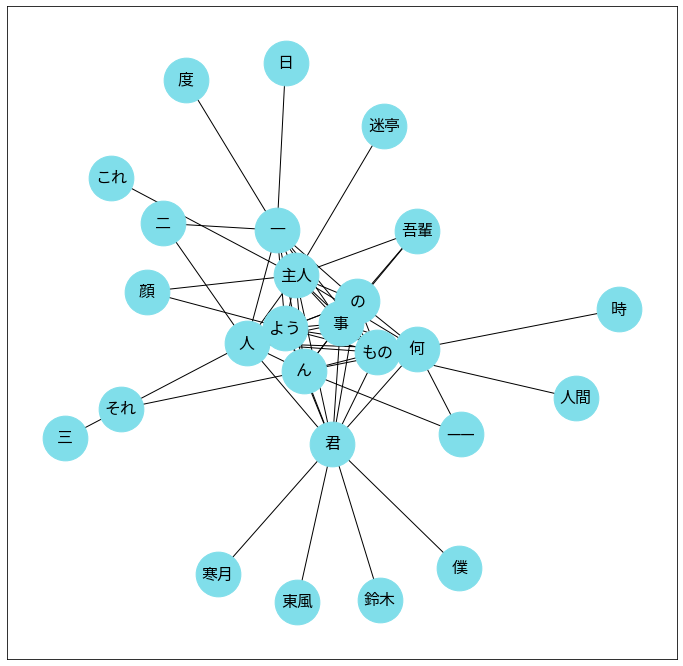

In [32]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import japanize_matplotlib
import networkx as nx


G = nx.Graph()

for data in cooccurrece_word_list:
    p = data['word']
    if not G.has_node(p):
        G.add_node(p)
    for (w, cnt) in data['most_common']:
        if not G.has_node(w):
            G.add_node(w)

        G.add_edge(p, w)

plt.figure(figsize=(12, 12))

# pos = nx.circular_layout(G)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='#80deea', node_size=2000)
nx.draw_networkx_edges(G, pos, width=1)
nx.draw_networkx_labels(G, pos, font_size=16, font_family='Noto Sans JP')

plt.show()